In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.shape

(2000, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    1316
1     684
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

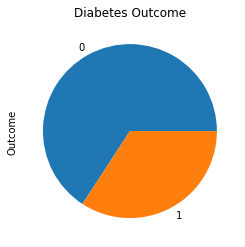

In [10]:
print(data.Outcome.value_counts())
data["Outcome"].value_counts().plot(kind="pie").set_title("Diabetes Outcome")

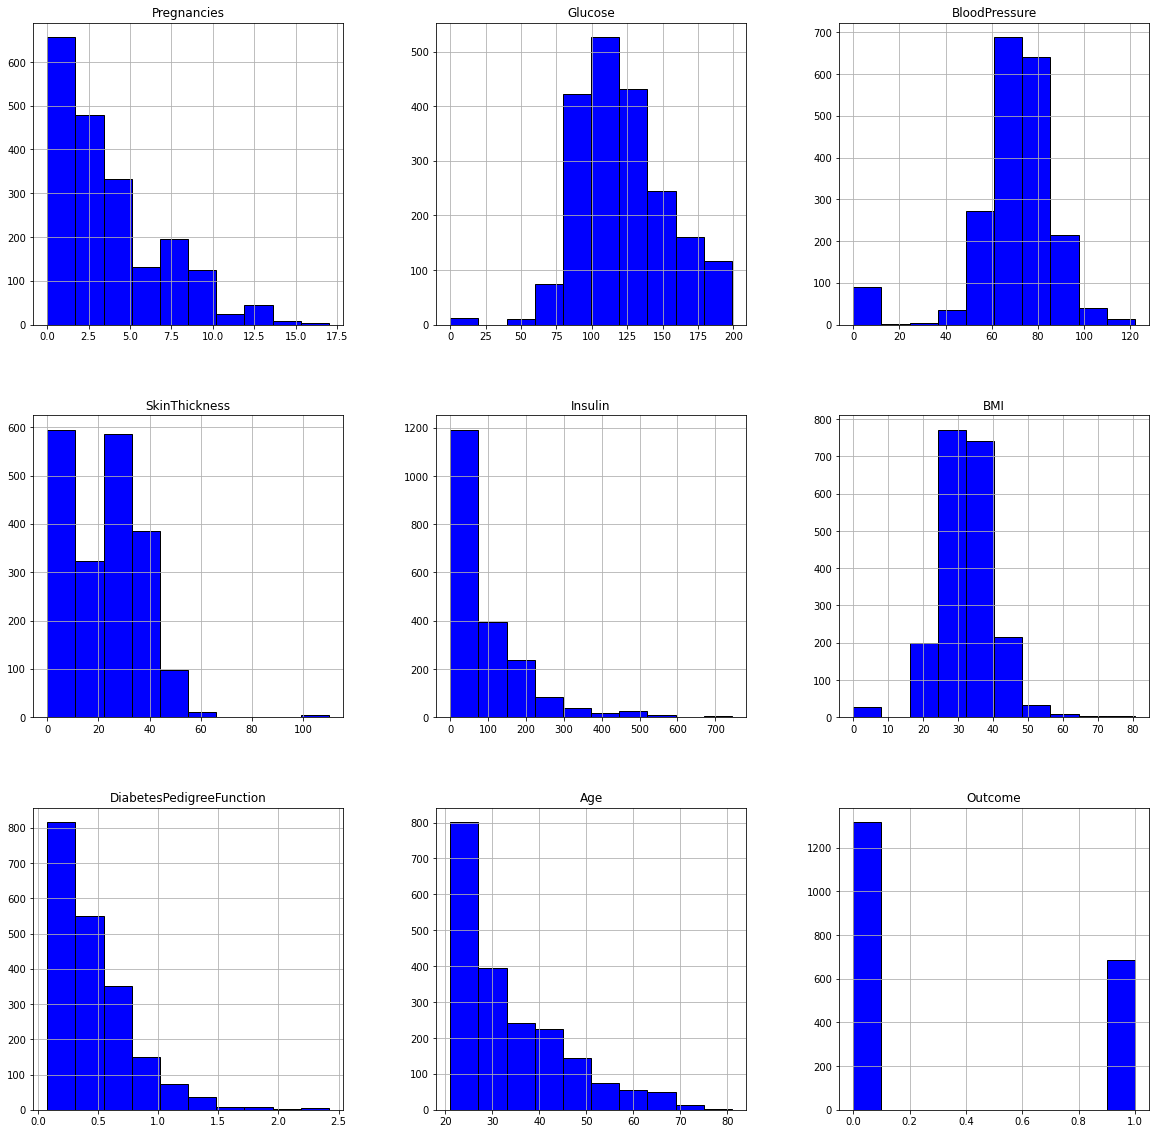

In [12]:
d = data.hist(figsize = (20,20),color='blue', edgecolor='black')

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

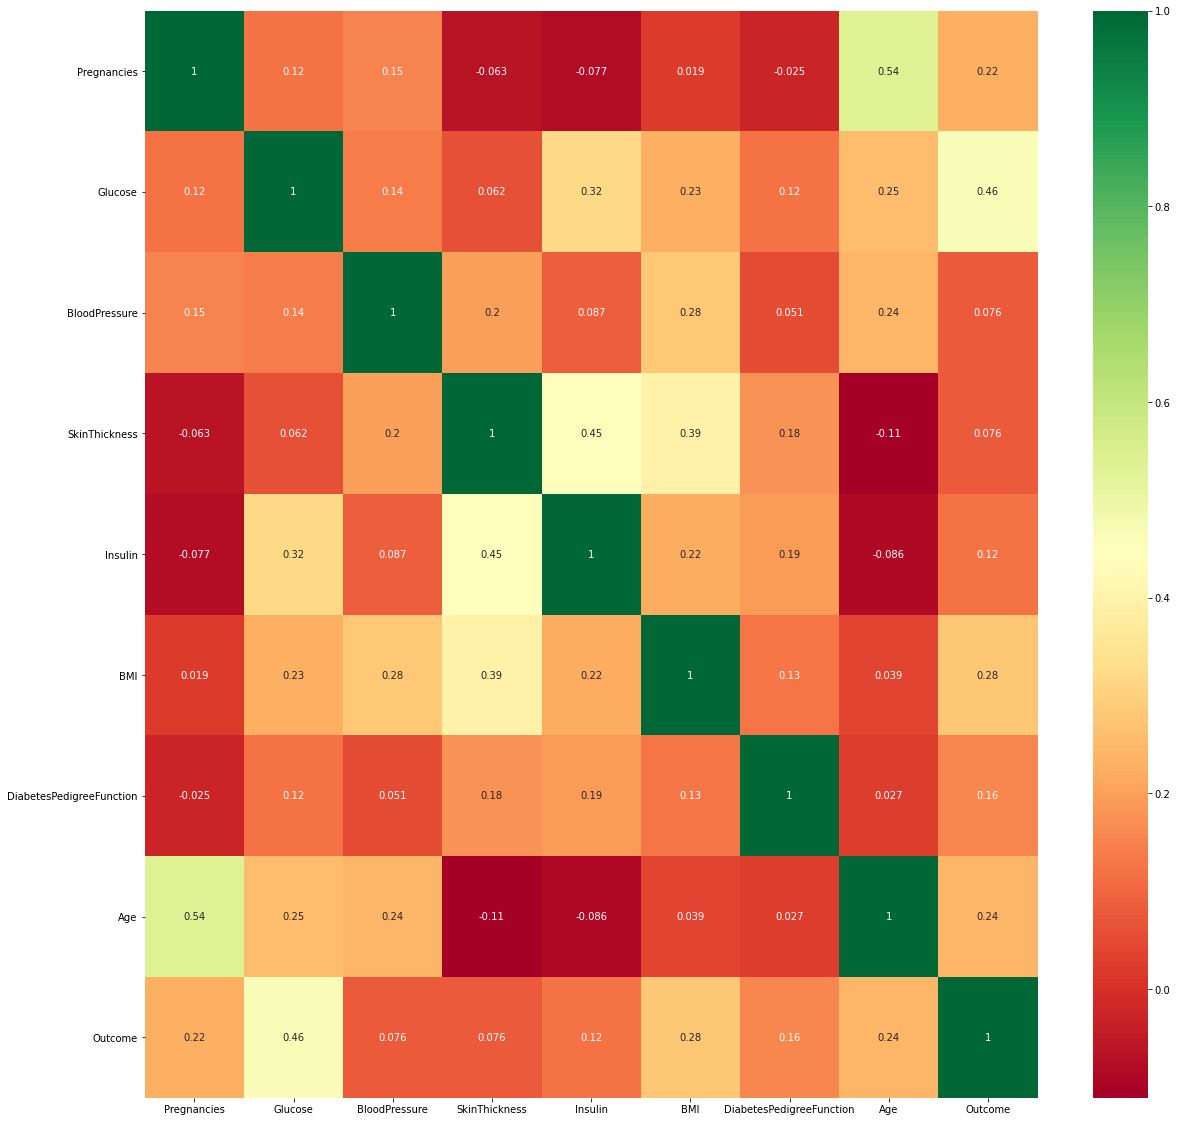

In [13]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
data.dtypes

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Outcome',axis=1)
y=data.Outcome

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [ ]:
# Check how many other missing(zero) values
print("total number of rows : {}".format(len(data)))
print("number of rows missing Glucose: {}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {}".format(len(data.loc[data['Age'] == 0])))

In [ ]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [ ]:
# try for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=10)
RFC.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

params={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100,250,500,750,1000],
    'criterion':['gini','entropy'], 
    'max_depth':[3,4,5,6,8,10,12,15], 
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True, False],
}

random_search=RandomizedSearchCV(RFC,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,random_state=10)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',random_state=10)

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
# try for xgboost
from xgboost import XGBClassifier

In [ ]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=10)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.05)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test,cv=10)

In [ ]:
score


In [ ]:
score.mean()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
# dump model
import pickle

In [ ]:
Pkl_Filename = "DP_model.pkl"  
with open(Pkl_Filename,'wb') as file:  
    pickle.dump(classifier,file)

In [ ]:
import pickle
with open('DP_model.pkl','rb') as file:
    classifier=pickle.load(file)

In [ ]:
classifier

In [ ]:
Pregnancies=2
Glucose=148
BloodPressure=64
SkinThickness=35
InsulinLevel=94
BMI=28.1
DiabetesPedigreeFunction=2.288
Age=25

In [ ]:
import numpy as np

In [ ]:
data=np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,InsulinLevel,BMI,DiabetesPedigreeFunction,Age]])

In [ ]:
pred=classifier.predict(data)

In [ ]:
pred